# Defining Problem Statement

**Problem Statement**
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business.

**About Netflix**
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Let's first import the required python libraries required to do the analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
from wordcloud import WordCloud

Added Netflix data csv file into a google drive and mounted google drive to google collab. Copied file path link for the same file and run pd.read_csv('link') will read and enable us to do modification and analysis of the data into a dataframe. I have assigned it to variable df here.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Data sets/netflix 1.csv')

Let's see the columns and data present in the dataframe

# Initial observations

In [ ]:
# Shape of DataFrame
df.shape

(8807, 12)

In [ ]:
#Dimension of the dataframe
df.ndim

2

In [ ]:
# columns in the datframe
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
# null/missing value detection
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Identifying duplicate values
df.duplicated().sum()

0

In [ ]:
# statistical summary before processing data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


It is a 2 dimensional dataframe with 8807 rows and 12 columns. There are null values or missing data in mutiple columns. We will handle it going further. No duplicates are present in the dataframe.

# Identifying columns with nested data

In [ ]:
df[df.director.apply(lambda x: ", " in str(x))].count()['director']

614

In [ ]:
df[df.cast.apply(lambda x: ", " in str(x))].count()['cast']

7101

In [ ]:
df[df.country.apply(lambda x: ", " in str(x))].count()['country']

1316

In [ ]:
df[df.listed_in.apply(lambda x: ", " in str(x))].count()['listed_in']

6787

In [ ]:
df[df.show_id.apply(lambda x: ", " in str(x))].count()['show_id']

0

In [ ]:
df[df.type.apply(lambda x: ", " in str(x))].count()['type']

0

In [ ]:
df[df.title.apply(lambda x: ", " in str(x))].count()['title']

# title in itself can have ',' and a movie or show cannot have more than 1 title. Hence presence of ',' doesn't mean nested data is present.
#We can ignore it in this case

135

In [ ]:
df[df.duration.apply(lambda x: ", " in str(x))].count()['duration']

0

So the columns with nested data are director, cast, country & listed_in columns.

Going further we will unnest this using df.explode() function.

Let's change the data type of categorical data to category type

In [ ]:
# conversion of categorical attributes to 'category'
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')
df['listed_in'] = df['listed_in'].astype('category')

# Replacing null with 0, converting data type and adding new date collumns

In [ ]:
df['date_added'].fillna(0, inplace = True)

In [ ]:
df['release_year'] = pd.to_datetime(df['release_year'], format = '%Y', errors = 'coerce').dt.strftime('%Y')
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')
df['year_added'] = df['date_added'].dt.strftime('%Y') # strftime will return a string representing date and time. '%Y' will extract year from the 'date_added' column
df['month_added'] = df['date_added'].dt.month_name()
df['day_added'] = df['date_added'].dt.day_name()

In [ ]:
df['release_year'] = df['release_year'].astype('int64', errors = 'ignore')
df['year_added'] = df['year_added'].astype('int64', errors = 'ignore')

In [ ]:
df['diff_years'] = df['year_added'] - df['release_year']

# Unnesting Director column and finding it's value counts and unique attributes

In [ ]:
df1 = df.copy()

In [ ]:
# split string at ','
df1['director'] = df['director'].str.split(', ')

# Explode the strings split by ',' into new rows
df_dir = df1.explode('director')
df_dir['director'] = df_dir['director'].str.replace(" ", '')

# Value counts of Director
df_dir['director'].value_counts()

# We will aslo remove the empty spaces since few rows have additional empty spaces which will change the value_counts

RajivChilaka     22
JanSuter         21
RaúlCampos       19
MarcusRaboy      16
SuhasKadav       16
                 ..
StuLivingston     1
JoeMenendez       1
EricBross         1
WillEisenberg     1
MozezSingh        1
Name: director, Length: 4992, dtype: int64

In [ ]:
# unique attributes of director column
df_dir['director'].nunique()

4992

# Unnesting Cast column and finding it's value counts and unique attributes

In [ ]:
# split string at ','
df1['cast'] = df['cast'].str.split(', ')

# Explode the strings split by ',' into new rows
df_cast = df1.explode('cast')
df_cast['cast'] = df_cast['cast'].str.replace(" ", '')
# Value counts of Cast
df_cast['cast'].value_counts()

AnupamKher               43
ShahRukhKhan             35
JulieTejwani             33
TakahiroSakurai          32
NaseeruddinShah          32
                         ..
MelanieStraub             1
GabrielaMariaSchmeide     1
HelenaZengel              1
DanielValenzuela          1
ChittaranjanTripathy      1
Name: cast, Length: 36435, dtype: int64

In [ ]:
# unique attributes of cast column
df_cast['cast'].nunique()

36435

# Unnesting Country column and finding it's value counts and unique attributes

In [ ]:
# split string at ','
df1['country'] = df['country'].str.split(', ')

# Explode the strings split by ',' into new rows
df_country = df1.explode('country')
df_dir['country'] = df_dir['country'].str.replace(" ", '')

# Value counts of Country
df_country['country'].value_counts()

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64

In [ ]:
# unique attributes of country column
df_country['country'].nunique()

127

# Unnesting listed_in (Genre) column and finding it's value counts and unique attributes

In [ ]:
# split string at ','
df1['listed_in'] = df['listed_in'].str.split(',')

# Explode the strings split by ',' into new rows
df_listed = df1.explode('listed_in')

df_listed['listed_in'] = df_listed['listed_in'].str.replace(' ', '')

# Value counts of Genre
df_listed['listed_in'].value_counts()

InternationalMovies         2752
Dramas                      2427
Comedies                    1674
InternationalTVShows        1351
Documentaries                869
Action&Adventure             859
TVDramas                     763
IndependentMovies            756
Children&FamilyMovies        641
RomanticMovies               616
TVComedies                   581
Thrillers                    577
CrimeTVShows                 470
Kids'TV                      451
Docuseries                   395
Music&Musicals               375
RomanticTVShows              370
HorrorMovies                 357
Stand-UpComedy               343
RealityTV                    255
BritishTVShows               253
Sci-Fi&Fantasy               243
SportsMovies                 219
AnimeSeries                  176
Spanish-LanguageTVShows      174
TVAction&Adventure           168
KoreanTVShows                151
ClassicMovies                116
LGBTQMovies                  102
TVMysteries                   98
Science&Na

In [ ]:
# unique attributes of listed_in column
df_listed['listed_in'].nunique()

42

# Rating column unique values and counts

In [ ]:
# unique attributes of rating column
df['rating'].nunique()

17

In [ ]:
# Value counts of rating
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

# Let's replace null values

- Country & Rating: mode of the column
- Director & Cast : Replace with 'NODATA'

# Replace null value with mode in rating column

In [ ]:
df['rating'].mode()

0    TV-MA
Name: rating, dtype: category
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

In [ ]:
df['rating'].fillna('TV-MA', inplace = True)

In [ ]:
df['rating'].isnull().sum()

0

# Replace Null values in Country column with mode of country

In [ ]:
df_country['country'].mode()

0    United States
Name: country, dtype: object

In [ ]:
df['country'].fillna('UnitedStates', inplace = True)

In [ ]:
df['country'].isnull().sum()

0

# Replace NULL values in other Columns

In [ ]:
# Replace null values in rating with mode of it's value
df['director'].fillna('NODATA', inplace = True)
df['cast'].fillna('NODATA', inplace = True)
df['date_added'].fillna(0, inplace = True)
df['duration'].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
day_added       0
diff_years      0
dtype: int64

We have replced the null values in all the columns

# Bringing all the unnested columns in a single dataframe

exploding all the columns in single dataframe will convert back the previous columns into list. Hence creationg new dataframe after exploding each and every column

In [ ]:
df2 = df.copy()

# split string at ','
df2['director'] = df['director'].str.split(', ')
df2['cast'] = df['cast'].str.split(', ')
df2['country'] = df['country'].str.split(', ')
df2['listed_in'] = df['listed_in'].str.split(', ')

In [ ]:
# Explode the strings split by ',' into new rows
df2_dir = df2.explode('director')
df2_dir['director'] = df2_dir['director'].str.replace(' ', '')

In [ ]:
# Explode the strings split by ',' into new rows
df_dir_cast = df2_dir.explode('cast')
df_dir_cast['cast'] = df_dir_cast['cast'].str.replace(' ', '')

In [ ]:
# Explode the strings split by ',' into new rows
df_dir_cast_coun = df_dir_cast.explode('country')
df_dir_cast_coun['country'] = df_dir_cast_coun['country'].str.replace(' ', '')

In [ ]:
# Explode the strings split by ',' into new rows
df_dir_cast_coun_list = df_dir_cast_coun.explode('listed_in')
df_dir_cast_coun_list['listed_in'] = df_dir_cast_coun_list['listed_in'].str.replace(' ', '')

In [ ]:
netflix = df_dir_cast_coun_list.copy()
netflix.reset_index(drop = True, inplace = True)

In [ ]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
day_added       0
diff_years      0
dtype: int64

# netflix is the pre-processed unnested data.

We have unnested all the columns, removed empty space from the values, updated null values, changed data type as required, creating additional columns of month, day and year added.

#Let's see usually after how many days after release content get's uploaded to Nertflix

The mode of diff_years is 0. Majority of the content is added to netflix in same year as its release.

In an average it takes 4.64 years for a content to be added on Netflix

In [ ]:
#This will help us understand after how many days of release, the content get's uploaded to Netflix
df['diff_years'].mode()

0    0
Name: diff_years, dtype: int64

In [ ]:
round(df['diff_years'].mean(),2)

4.64

# Visual Analysis

# Distribution of content type on Netflix

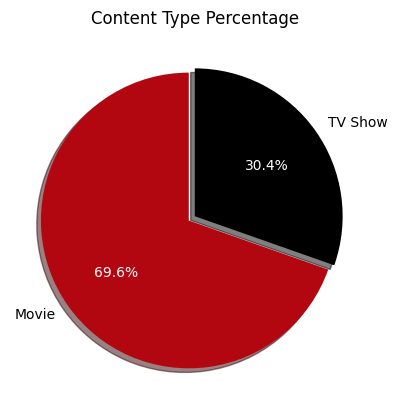

In [ ]:
y_bar = df['type'].value_counts().values
x_bar = df['type'].value_counts().index
autotexts = plt.pie(y_bar, labels=x_bar, autopct='%1.1f%%', explode=(0.05, 0),
                    shadow = True, startangle = 90,
                    colors=['#b20710', 'black'], textprops={'color': 'white'})

# Set text color to white for better visibility
for ins in autotexts[1]:
    ins.set_color('Black')

plt.title('Content Type Percentage')

# Show the pie chart
plt.show()

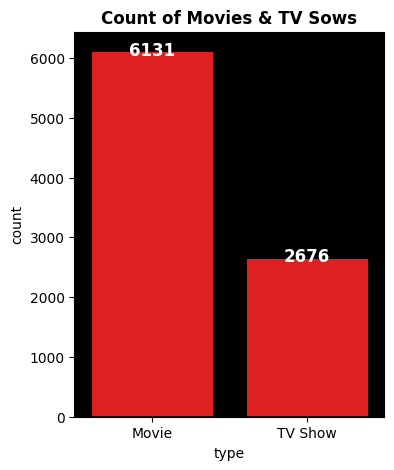

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 5))

# Create a countplot with red bars and black background
ax = sns.countplot(x='type', data=df, color='red', edgecolor='black', linewidth=2)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Set the background color to black
ax.set_facecolor('black')

# Set title and show the plot
plt.title('Count of Movies & TV Sows', fontsize=12, fontweight='bold', color='Black')
plt.show()


**Observations:**

From the below charts, we can see that Netflix has 69.6% (6131) Movies and 30.4% (2676) TV Shows.

There are more movies on Netflix compared to TV Shows.

#Country column analysis


In [ ]:
#Top 10 countries by content count

top_country = netflix.groupby('country')['show_id'].nunique().sort_values(ascending = False).reset_index(name = 'counts')
top_country = top_country[:10]

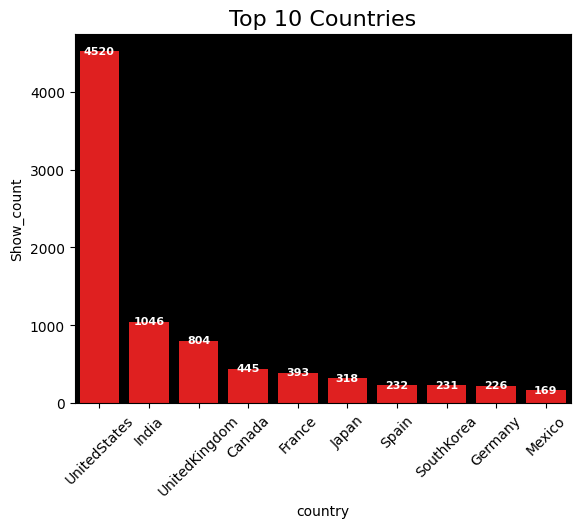

In [ ]:
# Countplot for top 10 countries
plt.figure()
ax = sns.barplot(x =top_country.reset_index()['country'], y=top_country.reset_index()['counts'], color = 'red')
# Annotate each bar with its count
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set the background color to black
ax.set_facecolor('black')
plt.title('Top 10 Countries', fontsize = 16)
plt.ylabel('Show_count')
plt.xticks(rotation = 45)
plt.show()

**Observations:**

Out of all the 198 countries in the datatset, United Sates has the highest number of contents i.e, 4521. India has the 2nd highest number with 1046 contents and United Kingdom has 804 contents irrespective of the content type.

The difference in content count between United States and India place is 4 times.

# Top countries by type of content




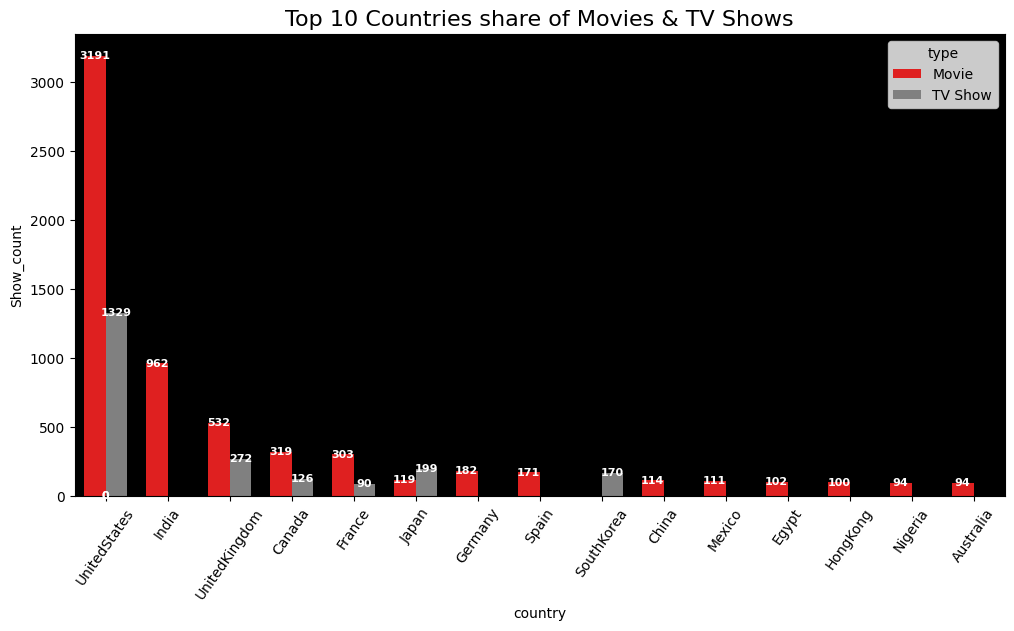

In [ ]:
# Top countries by type of content
top_country_type = netflix.groupby(['country', 'type'])['show_id'].nunique().sort_values(ascending = False).reset_index(name = 'counts')
top_country_type = top_country_type[:20]

# Top 10 Countries share of Movies & TV Shows
plt.figure(figsize=(12, 6))  # Set the figure size

# Use sns.barplot and set width parameter to increase the size of each bar
ax = sns.barplot(x=top_country_type.reset_index()['country'], y=top_country_type.reset_index()['counts'],
                 hue=top_country_type.reset_index()['type'], palette=['red', 'grey'], width=0.7)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set the background color to black
ax.set_facecolor('black')
plt.title('Top 10 Countries share of Movies & TV Shows', fontsize=16)
plt.ylabel('Show_count')
plt.xticks(rotation=55)

plt.show()


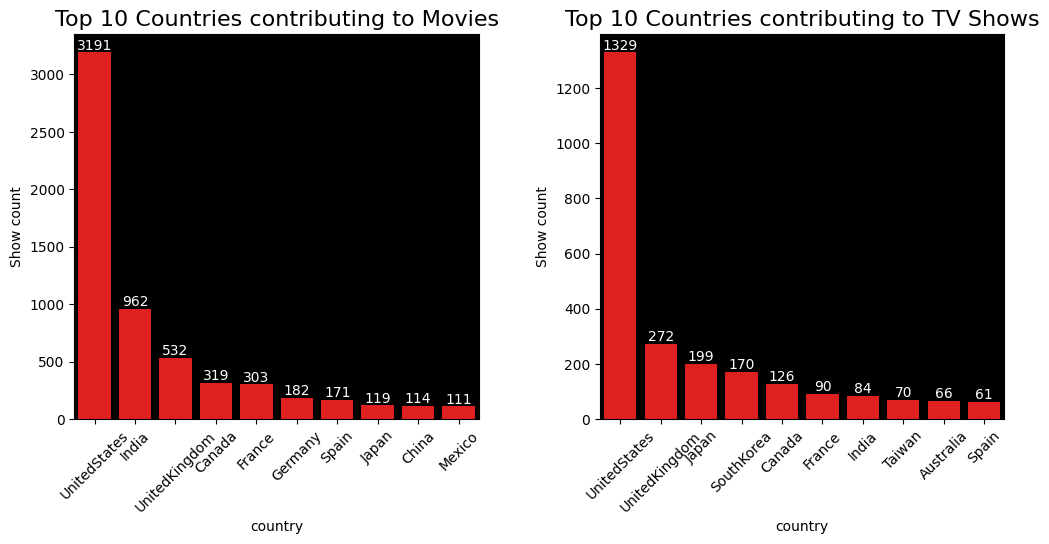

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Change the subplot layout to 1 row and 2 columns
fig.subplots_adjust(wspace=0.3)  # Adjust the horizontal space between subplots

# Set facecolor for the first subplot
axs[0].set_facecolor('black')

# Plot the bar chart in the first subplot (Top 10 Countries contributing to Movies)
top_country_movie = netflix.groupby(['country', 'type'])['show_id'].nunique().sort_values(ascending=False).reset_index(name='counts')
top_country_movie = top_country_movie[top_country_movie['type'] == 'Movie'][:10]
sns.barplot(x=top_country_movie.reset_index()['country'], y=top_country_movie.reset_index()['counts'], color=('red'), ax=axs[0])
axs[0].set_title('Top 10 Countries contributing to Movies', fontsize=16)
axs[0].set_ylabel('Show count')
axs[0].tick_params(axis='x', rotation=45)

# Annotate each bar with its count in the first subplot
for i, v in enumerate(top_country_movie['counts']):
    axs[0].text(i, v + 0.1, str(v), color='white', ha='center', va='bottom')

# Plot the bar chart in the second subplot (Top 10 Countries contributing to TV Shows)
axs[1].set_facecolor('black')
top_country_tv = netflix.groupby(['country', 'type'])['show_id'].nunique().sort_values(ascending=False).reset_index(name='counts')
top_country_tv = top_country_tv[top_country_tv['type'] == 'TV Show'][:10]
sns.barplot(x=top_country_tv.reset_index()['country'], y=top_country_tv.reset_index()['counts'], color=('red'), ax=axs[1])
axs[1].set_title('Top 10 Countries contributing to TV Shows', fontsize=16)
axs[1].set_ylabel('Show count')
axs[1].tick_params(axis='x', rotation=45)

# Annotate each bar with its count in the second subplot
for i, v in enumerate(top_country_tv['counts']):
    axs[1].text(i, v + 0.5, str(v), color='white', ha='center', va='bottom')

# Show the plot
plt.show()


**Observations:**

The difference in content count between United States and India place is 4 times.

We can say that United States has major highest number of content in both Movies & TV Shows compared to any other country.

India has 2nd highest movie content while the TV Show content is very negliggible comparetively.

United Kingdom has 2nd highest TV show content and 3rd highest Movie content

#Content count in each type of rating

In [ ]:
# Let's identify the highest common rating of the content on netflix
top_rating = df.groupby('rating')['show_id'].nunique().sort_values(ascending = False).reset_index(name='count')

top_rating_movie = df[df['type'] == 'Movie']
top_rating_movie = top_rating_movie['rating'].value_counts().sort_values(ascending = False).reset_index(name = 'count')

top_rating_tv = df[df['type'] == 'TV Show']
top_rating_tv = top_rating_tv['rating'].value_counts().sort_values(ascending = False).reset_index(name = 'count')

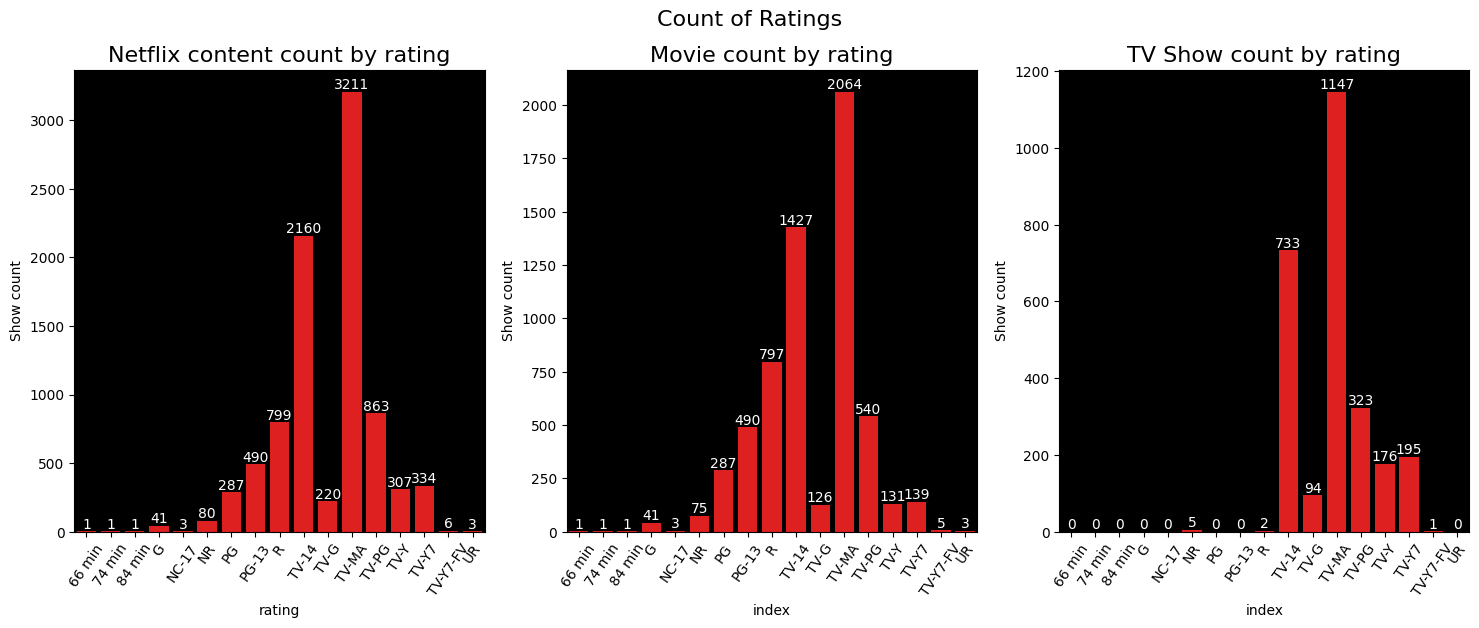

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Change the subplot layout to 1 row and 3 columns
fig.subplots_adjust(wspace=0.2)  # Adjust the horizontal space between subplots
fig.suptitle('Count of Ratings', fontsize=16)

# Function to add count values to each bar
def add_counts_to_bars(ax):
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', color='white')

# Plot the first bar chart (Netflix content by rating)
axs[0].set_facecolor('black')
sns.barplot(x=top_rating['rating'], y=top_rating['count'], color='red', ax=axs[0])
axs[0].set_title('Netflix content count by rating', fontsize=16)
axs[0].set_ylabel('Show count')
axs[0].tick_params(axis='x', rotation=55)

# Annotate each bar with its count in the first subplot
add_counts_to_bars(axs[0])

# Plot the second bar chart (Movie count by rating)
axs[1].set_facecolor('black')
sns.barplot(x=top_rating_movie['index'], y=top_rating_movie['count'], color='red', ax=axs[1])
axs[1].set_title('Movie count by rating', fontsize=16)
axs[1].set_ylabel('Show count')
axs[1].tick_params(axis='x', rotation=55)

# Annotate each bar with its count in the second subplot
add_counts_to_bars(axs[1])

# Plot the third bar chart (TV Show count by rating)
axs[2].set_facecolor('black')
sns.barplot(x=top_rating_tv['index'], y=top_rating_tv['count'], color='red', ax=axs[2])
axs[2].set_title('TV Show count by rating', fontsize=16)
axs[2].set_ylabel('Show count')
axs[2].tick_params(axis='x', rotation=55)

# Annotate each bar with its count in the third subplot
add_counts_to_bars(axs[2])

# Show the plot
plt.show()


**Observations:**

Top 3 types of rating in Movies & TV Shows both are TV-MA, TV-14, TV-PG.

# Top Genre across content Type on Netflix

In [ ]:
# Top Genre in general
genre = df_listed[['listed_in', 'show_id', 'type']].fillna('NODATA')
# Top Genre in Movies
mov_genre = genre[genre['type'] == 'Movie']
mov_genre_count = mov_genre.groupby('listed_in')['show_id'].nunique().sort_values(ascending = False).reset_index(name = 'count')

# Top Genre in Tv Shows
tv_genre = genre[genre['type'] == 'TV Show']
tv_genre_count = tv_genre.groupby('listed_in')['show_id'].nunique().sort_values(ascending = False).reset_index(name = 'count')

<ipython-input-61-3f3c5e8a2da0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, color='white')
<ipython-input-61-3f3c5e8a2da0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, color='white')


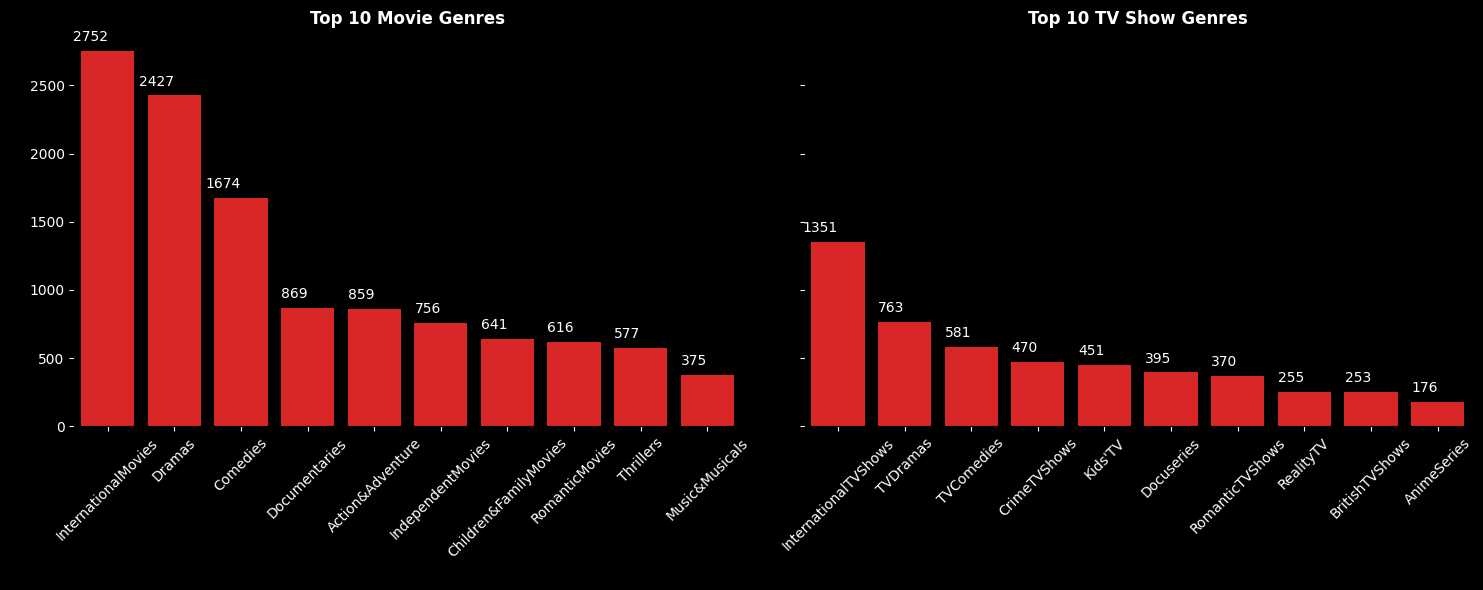

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'genre' is your DataFrame

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True, facecolor='black')

# Plot for Movie Genres
sns.barplot(data=mov_genre_count[:10], x='listed_in', y='count', color='red', ax=axs[0], saturation=0.7)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, color='white')
axs[0].set_title('Top 10 Movie Genres', color='white', fontsize = 12, fontweight = 'bold')
axs[0].set_facecolor('black')
axs[0].tick_params(axis='both', colors='white')

# Plot for TV Show Genres
sns.barplot(data=tv_genre_count[:10], x='listed_in', y='count', color='red', ax=axs[1], saturation=0.7)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, color='white')
axs[1].set_title('Top 10 TV Show Genres', color='white', fontsize = 12, fontweight = 'bold')
axs[1].set_facecolor('black')
axs[1].tick_params(axis='both', colors='white')

# Add count values at the top of each bar
for ax in axs:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='right', va='center', xytext=(0, 10), textcoords='offset points', color='white')

# Adjust layout
plt.tight_layout()

plt.show()


**Observation:**

Here we can see top 10 genres in Movies & TV Shows

- In Movies, International Movies, Dramas & Comedies are the top 3 genre in Movies globally.

- In TV Shows, International TV Shows, TV Dramas & TV Comedies are the top 3 genre in Movies globally.

- We can conclude that International content, Dramas & comedies type of genre are the top genre globally across content type.

# Most famous Genre in top 10 Countries

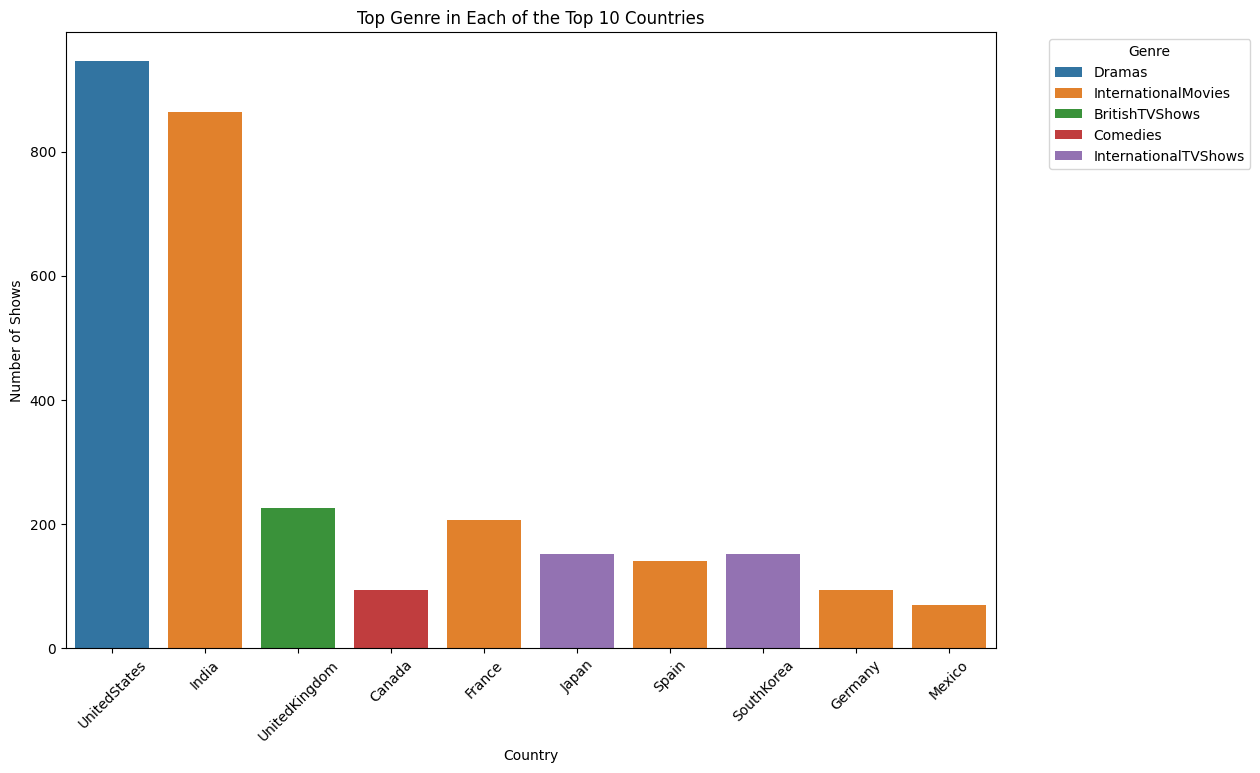

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'Netflix'
# Replace 'Netflix' with the actual name of your DataFrame

# Step 1: Find the top 10 countries based on the total number of shows
top_countries = netflix.groupby('country')['show_id'].nunique().sort_values(ascending=False).nlargest(10).index

# Step 2: Filter the DataFrame for the top 10 countries
top_countries_df = netflix[netflix['country'].isin(top_countries)]

# Step 3: Group by 'country' and 'listed_in' to count occurrences
genre_counts = top_countries_df.groupby(['country', 'listed_in'])['show_id'].nunique().reset_index(name='count')

# Step 4: For each of the top 10 countries, find the top genres
top_genres_by_country = pd.DataFrame()

for country in top_countries:
    top_genres_by_country = pd.concat([top_genres_by_country, genre_counts[genre_counts['country'] == country].nlargest(1, 'count')])

# Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(data=top_genres_by_country, x='country', y='count', hue='listed_in')
plt.title('Top Genre in Each of the Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Observation:**

We can see that in toppest country United States, highest or most famous genre is Dramas though the highest count of genre is International Movies, while in India it is International Movies.

In majority of the top 10 countries most famous genre is International Movies.

British TV Shows is most famous in United Kingdom, which is the top 3rd country.

Interesting to see comedies is the most famous genre in Canada.

Japan & South Korea has International TV Shows as the most famous genre.

# Release per year




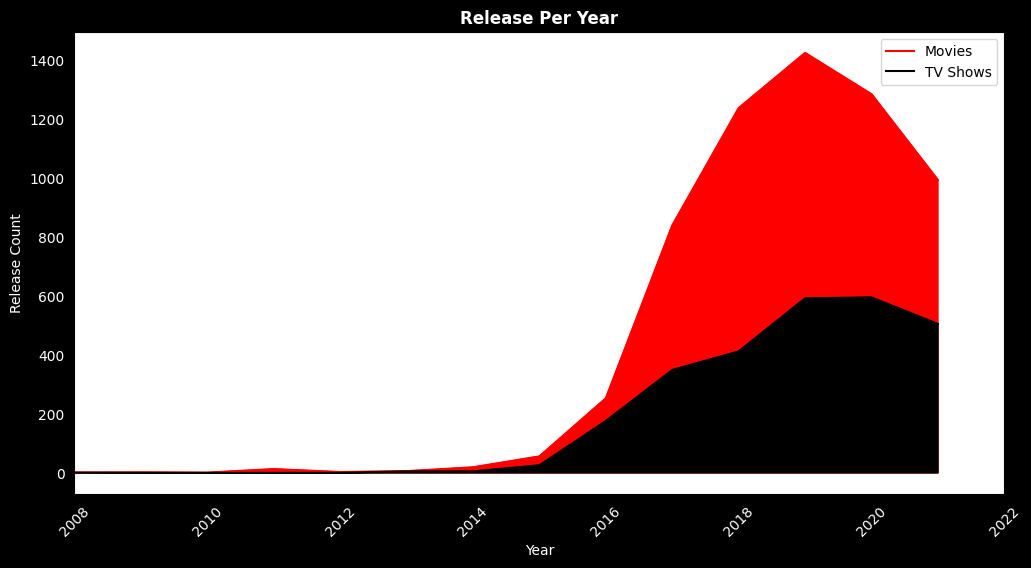

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

release_year = df.groupby(['year_added', 'type'])['type'].count().reset_index(name='release_count').sort_values(by='year_added', ascending=False)

# Convert 'year_added' to integers
release_year['year_added'] = release_year['year_added'].astype(int)

# Set the figure size and background color
plt.figure(figsize=(12, 6), facecolor='black')

# Plot lineplot for Movies
gfg = sns.lineplot(x="year_added", y="release_count", data=release_year[release_year['type'] == 'Movie'], color='red', label='Movies', markers=True)

# Fill the area under the red line
plt.fill_between(x=release_year[release_year['type'] == 'Movie']['year_added'], y1=release_year[release_year['type'] == 'Movie']['release_count'], color='red', alpha=1)

# Plot lineplot for TV Shows
gfg = sns.lineplot(x="year_added", y="release_count", data=release_year[release_year['type'] == 'TV Show'], color='black', label='TV Shows', markers=True)

# Fill the area under the black line
plt.fill_between(x=release_year[release_year['type'] == 'TV Show']['year_added'], y1=release_year[release_year['type'] == 'TV Show']['release_count'], color='black', alpha=1)

# Set x-axis ticks to start from 2000 and go up to the last available year with an interval of 1
plt.xlim(2008, 2022)
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.title('Release Per Year', fontsize=12, fontweight='bold', color='white')

# Add labels to the axes and title to the plot
plt.xlabel("Year", color='white')
plt.ylabel("Release Count", color='white')
plt.legend()

plt.show()

**Observation:**

- We can see that release per year started increasing slightly from 2011.

- Since 2013, the number of releases per year started increaing at higher rate in both TV Shows & Movies.

- In the year 2019, there was highest number of Movies & TV Shows were released on Netflix. Count of movies increased exponentianlly compared to TV Shows.

- There after, number of movies started to decline drastically for the next 2 consecutive years

- In the year 2020, number of TV Shows had no much difference. After 2020, it started to decline.

# Best month to release content on Netflix


In [ ]:
# Best month to release TV Show
df_tv_mon = df[df['type'] == 'TV Show'].reset_index().copy()
df_tv_mon = df_tv_mon.groupby('month_added')['show_id'].nunique().sort_values(ascending = False).reset_index(name='count')

# Best month to release movie
df_movie_mon = df[df['type'] == 'Movie'].reset_index().copy()
df_movie_mon = df_movie_mon.groupby('month_added')['show_id'].nunique().sort_values(ascending = False).reset_index(name='count')

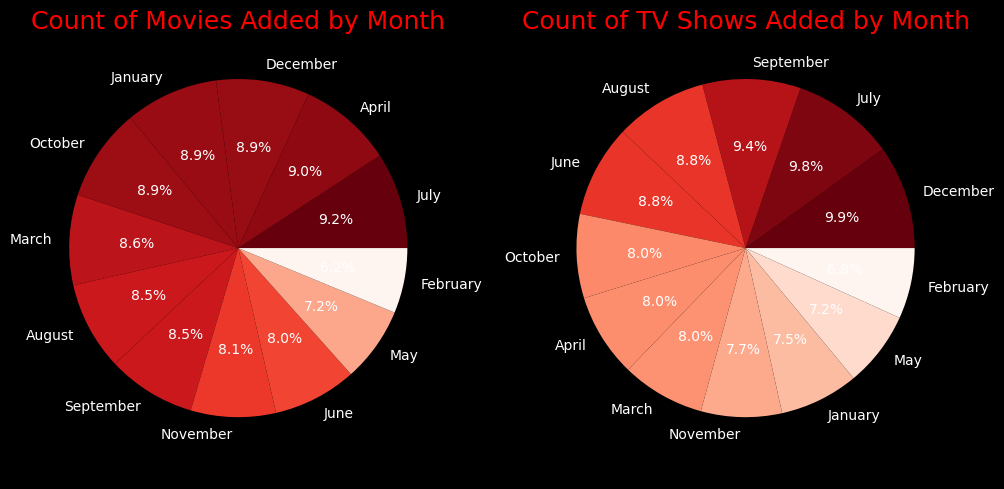

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

# Assuming df_movie_mon and df_tv_mon are your DataFrames for movies and TV shows
plt.figure(figsize=(12, 6), facecolor='black')  # Set the background color of the figure to black

# Plotting the pie chart for movies
plt.subplot(1, 2, 1, facecolor='black')  # Set the background color of the subplot to black

# Normalize values for a gradient effect
norm_movies = Normalize(vmin=df_movie_mon['count'].min(), vmax=df_movie_mon['count'].max())
colors_movies = cm.Reds(norm_movies(df_movie_mon['count']))

# Plot the pie chart with gradient colors for movies
plt.pie(x=df_movie_mon['count'], labels=df_movie_mon['month_added'], autopct='%1.1f%%', colors=colors_movies, textprops={'color': 'white'})

# Adding labels and title for movies
plt.xlabel('Count')
plt.title('Count of Movies Added by Month', color='red', fontsize = 18)  # Set title color to white

# Plotting the pie chart for TV shows
plt.subplot(1, 2, 2, facecolor='black')  # Set the background color of the subplot to black

# Normalize values for a gradient effect
norm_tv_shows = Normalize(vmin=df_tv_mon['count'].min(), vmax=df_tv_mon['count'].max())
colors_tv_shows = cm.Reds(norm_tv_shows(df_tv_mon['count']))

# Plot the pie chart with gradient colors for TV shows
plt.pie(x=df_tv_mon['count'], labels=df_tv_mon['month_added'], autopct='%1.1f%%', colors=colors_tv_shows, textprops={'color': 'white'})

# Adding labels and title for TV shows
plt.title('Count of TV Shows Added by Month', color='red', fontsize = 18)  # Set title color to white

# Display the plot
plt.show()


**Observation:**

Movies:

- Highest number of movies were released in July with 9.2%.
- While April had 9% and December, January, October had 8.9% of movie releases resepctively.
- February had least percentage of releases of 6.2%

TV Shows:

- December, July & September had 9.9%, 9.8% & 9.4% of TV Show releases respectively.
- February had least percentage of releases of 6.9%

We can conclude that July & December (Holiday season) are the best time to relase any type of content on Netflix. Along with that Aoril is also the best month to release Movies.

# Best day to release content on Netflix

In [ ]:
# Best day of the week to release TV Show
tv_day = df[df['type'] == 'TV Show']
tv_day = tv_day.groupby('day_added')['show_id'].nunique().sort_values(ascending = False).reset_index(name='count')


# Best day of the week to release Movie
movie_day = df[df['type'] == 'Movie']
movie_day = movie_day.groupby('day_added')['show_id'].nunique().sort_values(ascending = False).reset_index(name='count')

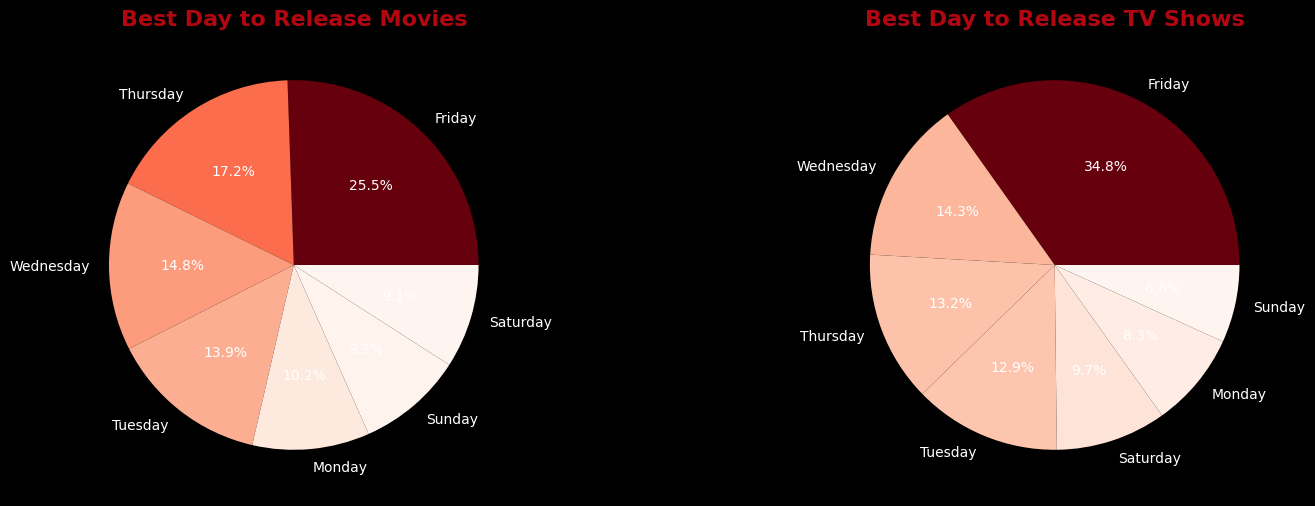

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

# Set the background color of the figure to black
plt.figure(figsize=(18, 6), facecolor='black')

# Subplot 1: Best day of the week to release Movie
plt.subplot(1, 2, 1, facecolor='black')

# Normalize values for a gradient effect
norm_movie_day = Normalize(vmin=movie_day['count'].min(), vmax=movie_day['count'].max())
colors_movie_day = cm.Reds(norm_movie_day(movie_day['count']))

# Plot the pie chart with gradient colors
plt.pie(movie_day['count'], labels=movie_day['day_added'], autopct='%1.1f%%', colors=colors_movie_day, textprops={'color': 'white'})
plt.title('Best Day to Release Movies', color='#b20710', fontsize = 16, fontweight='bold')

# Subplot 2: Best day of the week to release TV Show
plt.subplot(1, 2, 2, facecolor='black')

# Normalize values for a gradient effect
norm_tv_day = Normalize(vmin=tv_day['count'].min(), vmax=tv_day['count'].max())
colors_tv_day = cm.Reds(norm_tv_day(tv_day['count']))

# Plot the pie chart with gradient colors
plt.pie(tv_day['count'], labels=tv_day['day_added'], autopct='%1.1f%%', colors=colors_tv_day, textprops={'color': 'white'})
plt.title('Best Day to Release TV Shows', color='#b20710', fontsize = 16, fontweight='bold')

# Display the plot
plt.show()


**Observations:**

- From the above pie chart it is evident that Friday is the best day of the week to relase both type of content with more than 1/4th of the content.

- For movies, saturday is the least preferred day to release.

- For tv shows, sunday is the least preferred day to release.

# Most Popular Actor/Actress

In [ ]:
# Most famous cast in overall content
all_cast = df_cast[['cast', 'type', 'show_id']].reset_index().fillna('NODATA') #df_cast is the dataset with exploded cast column

#Most Famous Movie Cast
movie_cast = all_cast[all_cast['type'] == 'Movie']
movie_cast_count = movie_cast.groupby('cast')['show_id'].nunique().sort_values(ascending = False).reset_index(name = 'count')

#Most Famous TV Show Cast
tv_cast = all_cast[all_cast['type'] == 'TV Show'].fillna('NODATA')
tv_cast_count = tv_cast.groupby('cast')['show_id'].nunique().sort_values(ascending = False).reset_index(name = 'count')

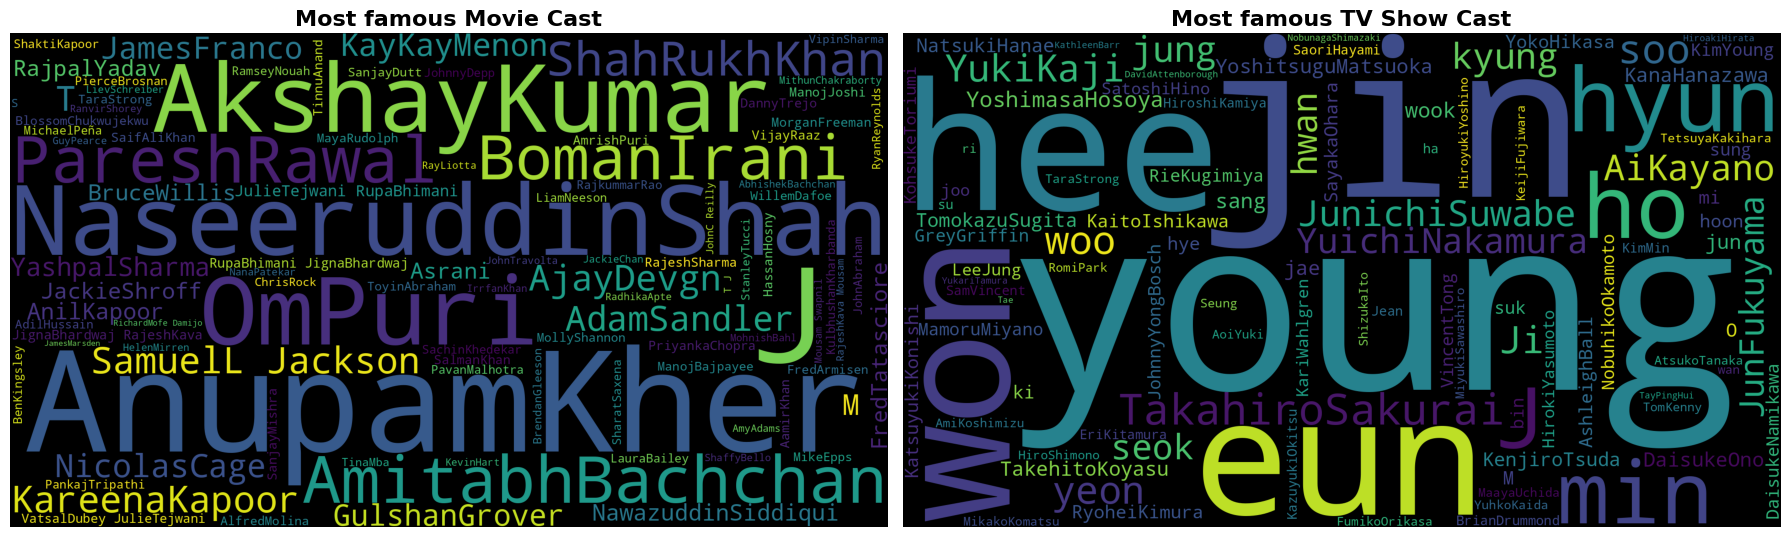

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Most famous Movie Cast
plt.subplot(1, 2, 1)
wordcloud_movie = WordCloud(background_color='black', max_words=100, width=1920, height=1080).generate(",".join(movie_cast['cast'].str.replace('NODATA', '').str.replace(" ", "")))
plt.title('Most famous Movie Cast', fontweight='bold', fontsize=16)
plt.imshow(wordcloud_movie)
plt.axis('off')

# Subplot 2: Most famous TV Show Cast
plt.subplot(1, 2, 2)
wordcloud_tv = WordCloud(background_color='black', max_words=100, width=1920, height=1080).generate(",".join(tv_cast['cast'].str.replace('NODATA', '').str.replace(" ", "")))
plt.title('Most famous TV Show Cast', fontweight='bold', fontsize=16)
plt.imshow(wordcloud_tv)
plt.axis('off')

# Adjust layout
plt.tight_layout()

# Save or display the plot
plt.savefig('genre_wordcloud.png')
plt.show()


**Observations:**

- Anupam Kher, Akshay KUmar, Naseeruddin Shah are the most famous movie cast.
- Young, Jin, Takahiro Sakurai are the most famous TV Show cast



# Most Famous Director based on count of content

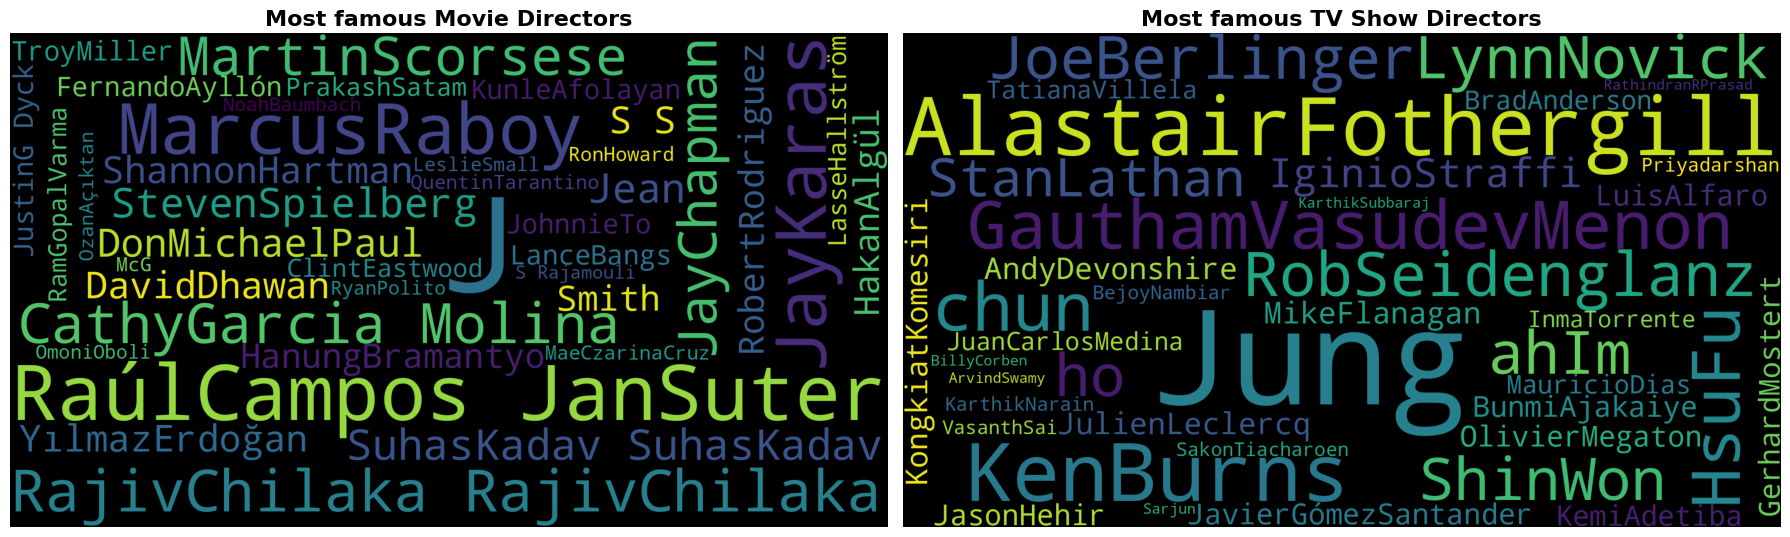

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Most famous Movie Directors
plt.subplot(1, 2, 1)
movie_dir = df[df['type'] == 'Movie'].reset_index()
wordcloud = WordCloud(background_color='black', max_words=40, width=1920, height=1080).generate(" ".join(movie_dir['director'].str.replace('NODATA', "").str.replace(" ", '')))
plt.title('Most famous Movie Directors', fontweight='bold', fontsize=16)
plt.imshow(wordcloud)
plt.axis('off')

# Subplot 2: Most famous TV Show Directors
plt.subplot(1, 2, 2)
tv_dir = df[df['type'] == 'TV Show'].reset_index()
wordcloud = WordCloud(background_color='black', max_words=40, width=1920, height=1080).generate(" ".join(tv_dir['director'].str.replace('NODATA', "").str.replace(" ", "")))
plt.title('Most famous TV Show Directors', fontweight='bold', fontsize=16)
plt.imshow(wordcloud)
plt.axis('off')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


**Observations:**

- Most famous Movie Directors are Rajiv Chilaka, Raul Campos, Jan Suter. globally
- Most famous TV Show Directors are Ken Burns, Alastair Fothergill.

#**Overall Observations:**

- Netflix has 69.6% (6131) Movies and 30.4% (2676) TV Shows. There are more movies on Netflix compared to TV Shows.

- United Sates has the highest number of contents. India has the 2nd and United Kingdom has 3rd highest number contents irrespective of the content type.
- The difference in content count between United States and India is 4 times.
- We can say that United States has major amount of content in both Movies & TV Shows compared to any other country.
- India has 2nd highest movie content while the TV Show content is very negligible comparatively.
- United Kingdom has 2nd highest TV show content and 3rd highest Movie content

- Top 3 type of rating globally in Movies & TV Shows are TV-MA, TV-14, TV-PG.

- In Movies, International Movies, Dramas & Comedies are the top 3 genres globally.
- In TV Shows, International TV Shows, TV Dramas & TV Comedies are the top 3 genres globally.
- We can conclude that International content, Dramas & comedies type of genre are the top genre globally across content type.

- We can see that in top most country United States, most famous genre is Dramas though the highest count of genre globally is International Movies, while in India it is International Movies.
- In majority of the top 10 countries most famous genre is International Movies.
- British TV Shows is most famous in United Kingdom, which is the top 3rd country.
- Interesting to see comedies is the most famous genre in Canada.
- Japan & South Korea has International TV Shows as the most famous genre.

- Majority of the content is added to Netflix in same year as its release.
- On an average it takes 4.64 years for a content to be added on Netflix

- We can see that release per year started increasing slightly from 2011.
- Since 2013, the number of releases per year started increasing at higher rate in both TV Shows & Movies.
- In the year 2019,  highest number of Movies & TV Shows were released on Netflix. Count of movies increased exponentially compared to TV Shows. There after, number of movies started to decline drastically for the next 2 consecutive years
- In the year 2020, number of TV Shows had no much difference. After 2020, it started to decline.

- Netflix has been adding content every month consistently with very less percentage difference.
- Highest number of movies were released in the month of July with 9.2%.
- While April had 9% and December, January, October had 8.9% of movie releases resepctively.
- February had least percentage of releases for both Movies & TV Shows.
- December, July & September had 9.9%, 9.8% & 9.4% of TV Show releases respectively.
We can conclude that July & December (Holiday season) are the best time to release any type of content on Netflix. Along with that April is also the best month to release Movies.

- It is evident that Friday is the best day of the week to release both type of content with more than 1/4th of the content.
- For movies, saturday is the least preferred day to release.
- For tv shows, sunday is the least preferred day to release.

- Anupam Kher, Akshay KUmar, Naseeruddin Shah are the most famous movie cast.
- Young, Jin, Takahiro Sakurai are the most famous TV Show cast
- Most famous Movie Directors are Rajiv Chilaka, Raul Campos, Jan Suter. globally
- Most famous TV Show Directors are Ken Burns, Alastair Fothergill.

#**Recommendations**

1. **Content Type Strategy:**
    - Continue focusing on producing a diverse range of movies as they constitute a significant portion of the content (69.6%).
    - While movies are dominant, explore opportunities to enhance and diversify the TV show catalog to attract a broader audience.
    
2. **Global Expansion:**
    - Given the high content count in the United States for both Movies & TV Shows, continue investing in content for this region.
    - Explore strategies to bridge the content gap between the United States and other countries, especially India and the United Kingdom.
3. **Genre Emphasis:**
    
    - Emphasise the production of International Movies, Dramas, and Comedies, as they are the top genres globally.
    - Tailor content based on regional preferences, for example, focusing on International Movies in India.
4. **Rating Consideration:**
    
    - Given that TV-MA, TV-14, and TV-PG are the top ratings, align content creation with these ratings to cater to a wide audience.
5. **Cast and Director Influence:**
    
    - Leverage the popularity of well-known actors like Anupam Kher, Akshay Kumar, and Naseeruddin Shah for movies.
    - Explore collaboration with famous TV show cast members like Young, Jin, and Takahiro Sakurai.
    - Consider working with acclaimed directors like Rajiv Chilaka, Raul Campos, and Jan Suter for movies and Ken Burns, Alastair Fothergill for TV shows.
6. **Consistent Content Addition:**
    
    - Maintain the current  consistent addition of content every month to keep the platform engaging for users.
7. **Strategic Release Month:**
    
    - Strategically plan releases for movies in July (9.2%), April (9%), and December (9.9%) for TV shows.
    - Leverage the insights on optimal release times, such as releasing content during July and December, as these months show higher percentages of releases.
8. **Release Day Optimisation:**
    
    - Focus on releasing content on Fridays, which is the most preferred day for both movies and TV shows.
    - Adjust the release strategy for movies on Saturdays and TV shows on Sundays.
9. **Global Audience Appeal:**
    
    - Explore strategies to create globally appealing content, considering the widespread popularity of genres like International content,  Dramas and Comedies.
10. **Observing Market Trends:**
    
    - Continue monitoring market trends and adapt content strategy based on the observed patterns, such as the growth in releases starting from 2014.